In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

In [3]:
from scipy.special import lambertw

In [4]:
delta = 0.05
L = 1.0
eps = 0.1

def h1(delta, L, eps, d):
    rho = 1 / d
    return int(
        np.ceil(
            2 * eps / (rho * L ** 2) + 8 / (rho ** 2) * np.log(2 / delta)
        )
    )

def h2(delta, L, eps, d):
    rho = 1 / d
    gamma = -1 / (1 + np.real(lambertw(-delta ** 2  / (4 * np.exp(1)), k=-1)))
    a = rho * L ** 2
    b = L ** 2 * np.sqrt(2 * (1 + gamma) * np.log(2 * np.sqrt(1 + 1 / gamma) / delta))
    return int(
        np.ceil(
            (b + np.sqrt(b ** 2 + a * eps)) ** 2 / (4 * a ** 2)
        )
    )


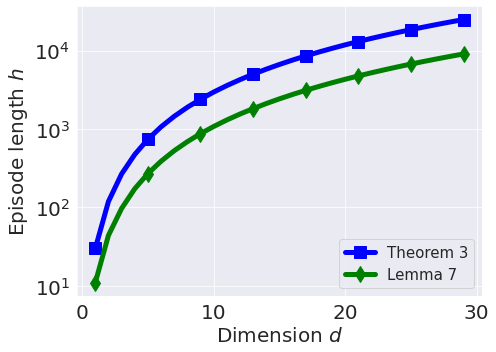

In [8]:
with sns.axes_style('darkgrid'):

    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

    dd = range(1, 30)
    ax.plot(dd, [h1(delta, L, eps, d) for d in dd], color='blue', linewidth=5, marker='s', markersize=12, markevery=4, label='Theorem 3')
    ax.plot(dd, [h2(delta, L, eps, d) for d in dd], color='green', linewidth=5, marker='d', markersize=12, markevery=4, label='Lemma 7',)

    ax.legend(loc='lower right', prop={'size': 15})
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('Dimension $d$', fontsize=20)
    ax.set_ylabel('Episode length $h$', fontsize=20)
#     ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0E}'.format(y)))
#     plt.ticklabel_format(style='sci', useOffset=False, axis='y', scilimits=(0,0), )
    
#     ax.set_xscale('log')
    ax.set_yscale('log')
    
    plt.tight_layout()
    plt.show()

    fig.savefig('h_ogd.pdf', format='pdf')